## First Models

In this notebook all I really want to do is see if all the custom functions written before work and transform the dataset seamlessly or not. Then try out a few basic classification models and see if they work at all for ternary classification.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [3]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
#import customized functions
from src.data_cleaning import cleaning_functions as cfs
from src.data_cleaning import exploration_functions as efs
from src.data_cleaning import processing_functions as pfs

In [5]:
X_train, X_test, y_train, y_test, classes_dict = pfs.processed_dataset()

In [6]:
X_train, encoders = pfs.ohe_all_categorical_features(X_train)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression(random_state= 2020, max_iter=1000)
fsm = lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Need to fix these but moving along for now....

In [9]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [10]:
confusion_matrix(y_train, fsm.predict(X_train))

array([[20870,     0,  3379],
       [ 2368,     0,   797],
       [ 6600,     1, 10535]])

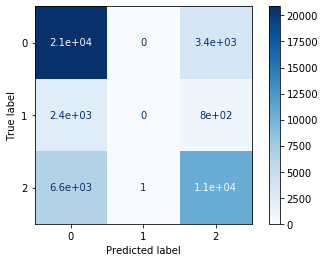

In [11]:
plot_confusion_matrix(fsm, X_train, y_train, cmap='Blues');

**Yikes that doesn't work at all**

#### DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2020)
fsm2 = dt.fit(X_train, y_train)
confusion_matrix(y_train, fsm2.predict(X_train))

array([[23770,   121,   358],
       [  593,  2438,   134],
       [ 1216,   104, 15816]])

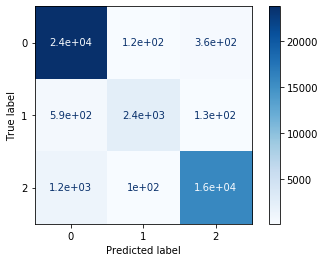

In [13]:
plot_confusion_matrix(fsm2, X_train, y_train, cmap='Blues');

#### Much better, long way to go still

### Next Steps:
* Read up ensemble methods
* Class imbalance - figure out how to fix that